In [2]:
import cv2
import os
from keras import layers, Input
from keras.models import Model
from keras import models
from keras import optimizers
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import numpy as np

In [4]:
total_data_final_2 = pd.read_csv('./total_data_final_2.csv')
total_data_final_2.columns
df = total_data_final_2[['folder_name','image_num','category_label','category_name',
                         'category_type','texture','shape','style']]
total_data_final_2

,image_name,folder_name,image_num,category_label,category_name,category_type,attribute_labels,texture,shape,style
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,Sheer_Pleated-Front_Blouse,img_00000001.jpg,3,Blouse,1,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,NaN,shift,NaN
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,Sheer_Pleated-Front_Blouse,img_00000002.jpg,3,Blouse,1,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,NaN,shift,NaN
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,Sheer_Pleated-Front_Blouse,img_00000003.jpg,3,Blouse,1,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,NaN,slip,NaN
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,Sheer_Pleated-Front_Blouse,img_00000004.jpg,3,Blouse,1,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,NaN,NaN,NaN
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,Sheer_Pleated-Front_Blouse,img_00000005.jpg,3,Blouse,1,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,NaN,NaN,shark
...,...,...,...,...,...,...,...,...,...,...
289103,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,Paisley_Print_Babydoll_Dress,img_00000050.jpg,41,Dress,3,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,palm springs,print shift,NaN
289104,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,Paisley_Print_Babydoll_Dress,img_00000051.jpg,41,Dress,3,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,palm,NaN,NaN
289105,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,Paisley_Print_Babydoll_Dress,img_00000052.jpg,41,Dress,3,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,palm,NaN,NaN
289106,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,Paisley_Print_Babydoll_Dress,img_00000053.jpg,41,Dress,3,-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -...,palm springs,print shift,NaN


In [5]:
# 불필요 col 삭제
df = df.drop(['style','shape'], axis=1)

# category_type = 3 삭제
df = df[df.category_type != 3]

# NA 삭제
df = df.dropna(axis=0, how='any')
df.shape

# dropna 하면서 drop된 행의 index 비어버림 : index 초기화
df = df.reset_index(drop=True)
df


,folder_name,image_num,category_label,category_name,category_type,texture
0,Sheer_Pleated-Front_Blouse,img_00000009.jpg,3,Blouse,1,southwestern-patterned
1,Sheer_Pleated-Front_Blouse,img_00000035.jpg,3,Blouse,1,polka dot
2,Sheer_Pleated-Front_Blouse,img_00000036.jpg,3,Blouse,1,tribal
3,Sheer_Pleated-Front_Blouse,img_00000038.jpg,3,Blouse,1,chiffon floral
4,Sheer_Pleated-Front_Blouse,img_00000040.jpg,3,Blouse,1,zig
...,...,...,...,...,...,...
64746,Destroyed_Denim_Cutoffs,img_00000015.jpg,24,Cutoffs,2,diamond
64747,Destroyed_Denim_Cutoffs,img_00000016.jpg,24,Cutoffs,2,diamond print
64748,Destroyed_Denim_Cutoffs,img_00000017.jpg,24,Cutoffs,2,diamond print
64749,Destroyed_Denim_Cutoffs,img_00000018.jpg,24,Cutoffs,2,paint


## texture별로 사진 재정리

In [6]:
# 폴더 생성 함수

def createfolder(foler_dir):
    try:
        if not os.path.exists(folder_dir):
            os.makedirs(folder_dir)
    except OSError:
        print('Error Creating directory'+folder_dir)


In [7]:
# texture 폴더 만들기

category_list = list(df['texture'].unique())
print(category_list)
print(f'category class 갯수: {len(category_list)}')

for folder_name in category_list:
    a = 'C:/Jupyter_Script/img/texture/' #폴더 만들 위치
    folder_dir = a + folder_name
    #print(folder_dir)
    createfolder(folder_dir)

['southwestern-patterned', 'polka dot', 'tribal', 'chiffon floral', 'zig', 'watercolor', 'varsity-striped', 'rugby stripe', 'palm tree', 'giraffe', 'southwestern-inspired', 'ikat print', 'colorblocked', 'rugby striped', 'patterned', 'ikat', 'colorblock', 'crochet floral', 'southwestern-print', 'giraffe print', 'leaf', 'mixed print', 'animal print', 'leaf print', 'ornate paisley', 'heart print', 'structured', 'stripes', 'ditsy floral', 'butterfly', 'embroidered floral', 'dotted', 'pinstriped', 'print', 'painted', 'multi-stripe', 'geo pattern', 'graphic', 'paint splatter', 'stripe', 'checked', 'ornate print', 'floral print', 'paisley print', 'speckled', 'kaleidoscope print', 'print shirt', 'mosaic', 'pattern', 'dots', 'botanical print', 'grid', 'baroque', 'marble print', 'linen', 'paint', 'botanical', 'medallion print', 'spotted', 'medallion', 'breton', 'daisy print', 'marble', 'pom-pom', 'linen-blend', 'striped', 'ribbed stripe', 'ornate', 'ringer', 'leopard print', 'southwestern', 'abs

In [12]:
# texture에 맞춰서 사진 다시 저장

for _ in range(df.shape[0]):
    num = str(_)
    texture = df['texture'][_]
    img_folder = df['folder_name'][_] 
    img_name = df['image_num'][_] 
    full_dir = str('C:/Users/Jisoo/Desktop/img/' + img_folder + '/' + img_name) # 원본 이미지 path

    img = cv2.imread(full_dir)
    img = cv2.resize(img, (150,150))
    
    new_dir = str('C:/Jupyter_Script/img/texture/' + texture) # 다시 저장할 path
    new_name = new_dir + '/' + texture + '_' + num + '.jpg'
    cv2.imwrite(new_name, img) 
    
    if _ % 5000 == 0:
        print(_)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000


## 얼굴있는 사진 제거

In [13]:
face_cascade = cv2.CascadeClassifier(
    './opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')

In [14]:
def count_face(x):
    face_cascade = cv2.CascadeClassifier('./opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
    grayImage = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grayImage, 1.03, 5)
    return faces.shape[0]

In [15]:
# 폴더 생성 함수

def createfolder(foler_dir):
    try:
        if not os.path.exists(folder_dir):
            os.makedirs(folder_dir)
    except OSError:
        print('Error Creating directory'+folder_dir) 

In [16]:
# noface_img 하위 폴더 만들기

path = 'C:/Jupyter_Script/img/texture/' # 가져오는 이미지 폴더 path
file_list = os.listdir(path)

for folder_name in file_list:
    path = 'C:/Jupyter_Script/img/noface_texture/' # 새로운 이미지 폴더 path
    folder_dir = path + folder_name
    createfolder(folder_dir)

In [17]:
# noface 사진 다시 저장

path = 'C:/Jupyter_Script/img/texture/'  # 가져오는 이미지 폴더 path
file_list = os.listdir(path)

for _ in range(len(file_list)):
    folder_name = file_list[_]
    new_dir = 'C:/Jupyter_Script/img/noface_texture/' + folder_name # 저장할 path
    jpg_path = path + file_list[_] + '/'
    jpg_file =  os.listdir(jpg_path)
    a = 0
    for i in range(len(jpg_file)):
        image_name = jpg_path + jpg_file[i]
        img = cv2.imread(image_name)

        try:
            count_face(img)
            
        except:
            new_name = new_dir + '/' + jpg_file[i]
            cv2.imwrite(new_name, img)
    
    if _ % 50 == 0:
        print(_)


0
50
100


## texture로 학습

In [ ]:
# generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range = 20,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     rescale = 1. / 255)

In [32]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=(150,150, 3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.2))
 
model.add(Dense(512, activation='relu'))
model.add(Dense(137, activation='softmax'))                                   # label, calss 갯수
model.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      432       
_________________________________________________________________
batch_normalization_9 (Batch (None, 150, 150, 16)      48        
_________________________________________________________________
activation_9 (Activation)    (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 38, 38, 32)        4608      
_________________________________________________________________
batch_normalization_10 (Batc (None, 38, 38, 32)        96        
__________

In [33]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# 데이터 셋
train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=10,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.7,
#                                    zoom_range=[0.9, 2.2],
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    fill_mode='nearest',
                                   validation_split=0.33)
 
training_set = train_datagen.flow_from_directory('C:/Jupyter_Script/img/noface_texture',
                                                 target_size = (150,150),
                                                 batch_size = 15,
                                                 class_mode = 'categorical',
                                                 subset="training"
                                                )
validation_set = train_datagen.flow_from_directory('C:/Jupyter_Script/img/noface_texture',
                                                 target_size = (150,150),
                                                 batch_size = 10,
                                                 class_mode = 'categorical',
                                                 subset="validation"
                                                  )
 

Found 43448 images belonging to 137 classes.
Found 21303 images belonging to 137 classes.


In [34]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./log.csv', append=True, separator=';')
 
 
hist = model.fit_generator(training_set,
                         steps_per_epoch = 10, #20
                         epochs = 10,  #1000
                         validation_data = validation_set,
                         validation_steps = 10,
                         callbacks=[csv_logger])
 
 

Epoch 1/10
10/10 [==============================] - 33s 3s/step - loss: 5.2245 - acc: 0.0200 - val_loss: 4.6798 - val_acc: 0.0900
Epoch 2/10
10/10 [==============================] - 31s 3s/step - loss: 4.8460 - acc: 0.0267 - val_loss: 4.7975 - val_acc: 0.0200
Epoch 3/10
10/10 [==============================] - 30s 3s/step - loss: 4.6836 - acc: 0.0600 - val_loss: 4.6824 - val_acc: 0.0700
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 4.7082 - acc: 0.0333 - val_loss: 4.7002 - val_acc: 0.0700
Epoch 5/10
10/10 [==============================] - 32s 3s/step - loss: 4.6157 - acc: 0.0400 - val_loss: 4.6881 - val_acc: 0.0100
Epoch 6/10
10/10 [==============================] - 31s 3s/step - loss: 4.5172 - acc: 0.0600 - val_loss: 4.6126 - val_acc: 0.0500
Epoch 7/10
10/10 [==============================] - 32s 3s/step - loss: 4.5712 - acc: 0.0733 - val_loss: 4.5698 - val_acc: 0.0500
Epoch 8/10
10/10 [==============================] - 31s 3s/step - loss: 4.4684 - acc: 0.10

In [ ]:
from keras.models import load_model

model.save('model_texture.h5')                       # 모델 저장 이름


# 모델 아키텍처를 json 형식으로 저장
json_string = model.to_json()

# json 파일에서 모델 아키텍처 재구성
model = model_from_json(json_string)

# Weights 따로 저장
model.save_weights()


from keras.models import load_model

model = load_model('model_texture.h5')


In [35]:
# output = classifier.predict_generator(test_set, steps=5)
# print(test_set.class_indices)
# print(output)
 
# 모델 평가하기
print("-- Evaluate --")
 
scores = model.evaluate_generator(
            validation_set,
            steps = 10)
 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
 
# 모델 예측하기
print("-- Predict --")
 
output = model.predict_generator(
            validation_set,
            steps = 100)
print(validation_set.class_indices)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
 

-- Evaluate --
acc: 5.00%
-- Predict --
{'abstract': 0, 'animal': 1, 'animal print': 2, 'bandana': 3, 'bandana print': 4, 'baroque': 5, 'baroque print': 6, 'bird': 7, 'bird print': 8, 'botanical': 9, 'botanical print': 10, 'boxy striped': 11, 'breton': 12, 'breton stripe': 13, 'brushstroke': 14, 'brushstroke print': 15, 'butterfly': 16, 'butterfly print': 17, 'camo': 18, 'camouflage': 19, 'checked': 20, 'checkered': 21, 'cheetah': 22, 'chevron': 23, 'chevron print': 24, 'chiffon floral': 25, 'circle': 26, 'clashist': 27, 'classic striped': 28, 'colorblock': 29, 'colorblocked': 30, 'crochet floral': 31, 'daisy': 32, 'daisy print': 33, 'diamond': 34, 'diamond print': 35, 'ditsy': 36, 'ditsy floral': 37, 'ditsy floral print': 38, 'dot': 39, 'dots': 40, 'dotted': 41, 'embroidered floral': 42, 'floral': 43, 'floral pattern': 44, 'floral print': 45, 'floral textured': 46, 'floral-embroidered': 47, 'flower': 48, 'foil': 49, 'folk print': 50, 'geo': 51, 'geo pattern': 52, 'geo print': 53, 'geo

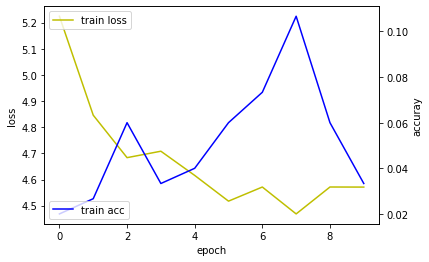

In [45]:
import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
 
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
##loss_ax.set_ylim([0.0, 0.5])
 
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
##acc_ax.set_ylim([0.8, 1.0])
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()

In [40]:
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
plt.show()

In [ ]:
input_tensor = Input(shape=(None, 150, 150, 3))

x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense('class갯수', activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()



In [ ]:
model.coopile(optimizer='rmsprop', loss='categorical_crossentropy')
x_train = 
y_train = 

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=20)
score = model.evaluate(x_train, y_train)